In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp

from rejectax import base_rejection_sampler, rejection_sampler

In [2]:
# 1D standard normal
def target(x):
    return jax.scipy.stats.norm.pdf(x, loc = 0, scale = 1)

In [3]:
# here the max_ratio is too low
z = rejection_sampler(
    key = jax.random.PRNGKey(0),
    target = target,
    lo = -5.0,
    hi = 5.0,
    n = 1_000,
    max_ratio = 1.0,
)

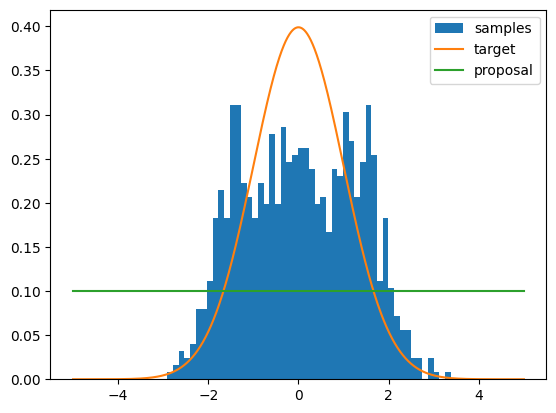

In [4]:
# therefore the samples do not represent the target
x = jnp.linspace(-5, 5, 1_000)
p = jax.vmap(target)(x)
plt.hist(z, bins = 50, density = True, label = 'samples')
plt.plot(x, p, label = 'target')
plt.plot(x, jnp.ones_like(x) * 0.1, label = 'proposal')
plt.legend()

In [5]:
# we know what the maximum density ratio is in this simple case
z = rejection_sampler(
    key = jax.random.PRNGKey(1),
    target = target,
    lo = -5.0,
    hi = 5.0,
    n = 1_000,
    max_ratio = p.max() / (1 / (5.0 - -5.0)),
)

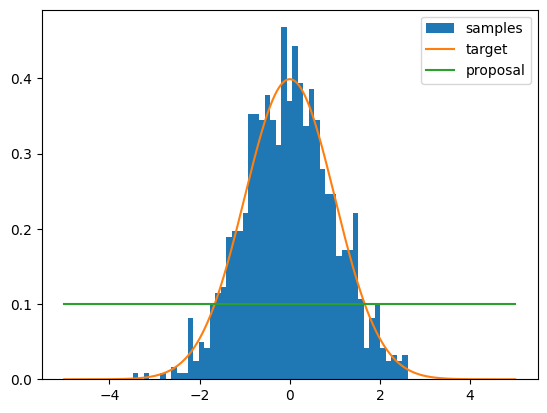

In [6]:
# this gives us fair draws
x = jnp.linspace(-5, 5, 1_000)
p = jax.vmap(target)(x)
plt.hist(z, bins = 50, density = True, label = 'samples')
plt.plot(x, p, label = 'target')
plt.plot(x, jnp.ones_like(x) * 0.1, label = 'proposal')
plt.legend()